## TensorFlow Standard CNNs
In this notebook we will try some standard CNN architectures, VGG, ResNet, and InceptionNet.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
import tensorflow.keras.applications.vgg16 as VGG16 
import tensorflow.keras.applications.resnet50 as ResNet50
import tensorflow.keras.applications.inception_v3 as InceptionV3

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [2]:
#Lets download the data
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-09-28 22:15:15--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  30.8MB/s    in 12s     

2020-09-28 22:15:28 (34.9 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [3]:
!unzip -qq -o Food-5K.zip

In [4]:
!mv Food-5K/* .

In [5]:
#Make directory structure to store data in Keras format
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

In [6]:
train_path = 'data/train'
valid_path = 'data/test'

In [7]:
IMAGE_SIZE = [200, 200]

In [8]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [9]:
folders = glob(train_path + '/*')
folders

['data/train/nonfood', 'data/train/food']

In [10]:
def makeModel(PreTrainedModel):
  ptm = PreTrainedModel(
      input_shape=IMAGE_SIZE + [3],
      weights='imagenet',
      include_top=False)
  ptm.trainable = False

  K = len(folders) # number of classes
  x = Flatten()(ptm.output)
  x = Dense(K, activation='softmax')(x)

  model = Model(inputs=ptm.input, outputs=x)

  print(model.summary())

  return model;

In [11]:
def makeImageDataGenerator(preprocess_input):
  # create an instance of ImageDataGenerator
  gen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    
    horizontal_flip=True,
    preprocessing_function=preprocess_input
  )

  gen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
  )

  return (gen_train, gen_test)

In [12]:
def runModel(gen_train, gen_test, model):
  batch_size = 128

  # create generators
  train_generator = gen_train.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
  )
  valid_generator = gen_test.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
  )
 
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

  r = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
    validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
  )

  train_generator2 = gen_test.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
  )
  model.evaluate(
    train_generator2,
    steps=int(np.ceil(len(image_files) / batch_size))
  )

  # loss
  plt.plot(r.history['loss'], label='train loss')
  plt.plot(r.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()

  # accuracies
  plt.plot(r.history['accuracy'], label='train acc')
  plt.plot(r.history['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()

58892288/58889256 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_______________________________________________________

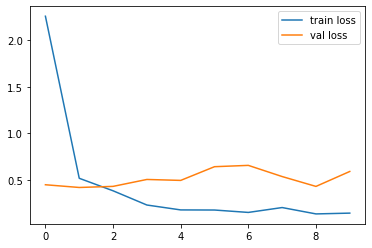

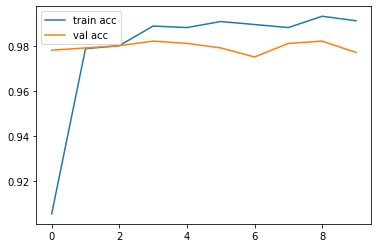

In [13]:
model = makeModel(VGG16.VGG16)
(gen_train, gen_test) = makeImageDataGenerator(VGG16.preprocess_input)
runModel(gen_train, gen_test, model)

94773248/94765736 [==============================] - 1s 0us/step
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________

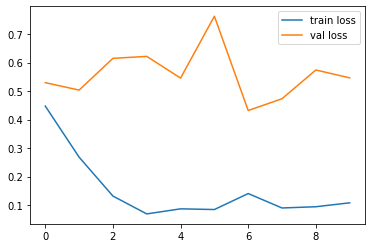

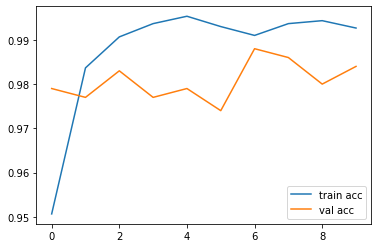

In [14]:
model = makeModel(ResNet50.ResNet50)
(gen_train, gen_test) = makeImageDataGenerator(ResNet50.preprocess_input)
runModel(gen_train, gen_test, model)

87916544/87910968 [==============================] - 2s 0us/step
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________

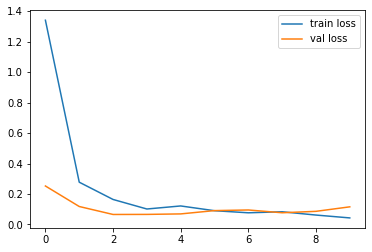

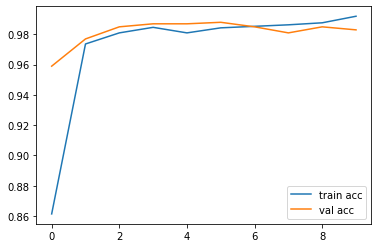

In [15]:
model = makeModel(InceptionV3.InceptionV3)
(gen_train, gen_test) = makeImageDataGenerator(InceptionV3.preprocess_input)
runModel(gen_train, gen_test, model)